In [1]:
# !pip install python_speech_features
# !pip install scipy
# !pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import scipy
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import scipy.io.wavfile as wav
from python_speech_features import mfcc
from tempfile import TemporaryFile
import os
import math
import pickle
import random
import operator

In [3]:
df = pd.read_csv('GenreData/features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:
df.shape

(1000, 60)

In [5]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [6]:
df2 = pd.read_csv('GenreData/features_3_sec.csv')
df2

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [7]:
data = pd.concat([df, df2])
data

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [8]:
audio_recording = "GenreData/genres_original/country/country.00050.wav"
data , sr = librosa.load(audio_recording)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [9]:
librosa.load(audio_recording, sr=45600)

(array([ 0.04563559,  0.06239938,  0.05848034, ..., -0.13778664,
        -0.11675889, -0.05944651], dtype=float32),
 45600)

In [10]:
import IPython
IPython.display.Audio(data, rate=sr)

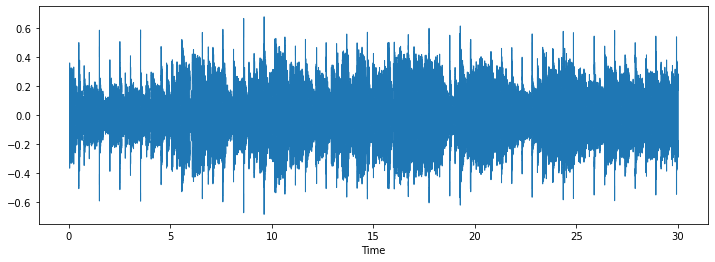

In [11]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data)
plt.show()

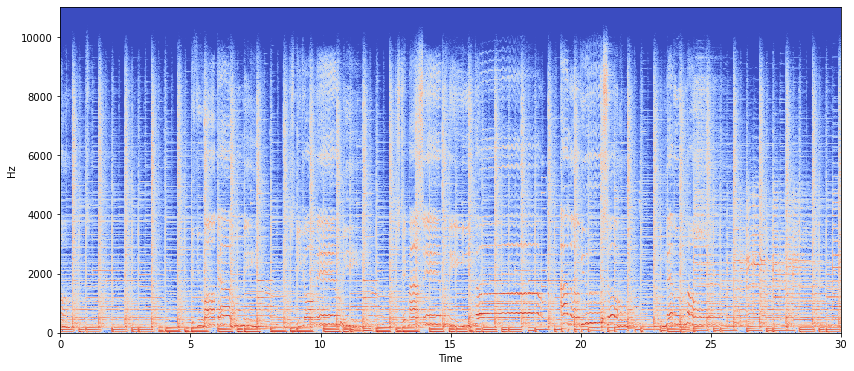

In [12]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

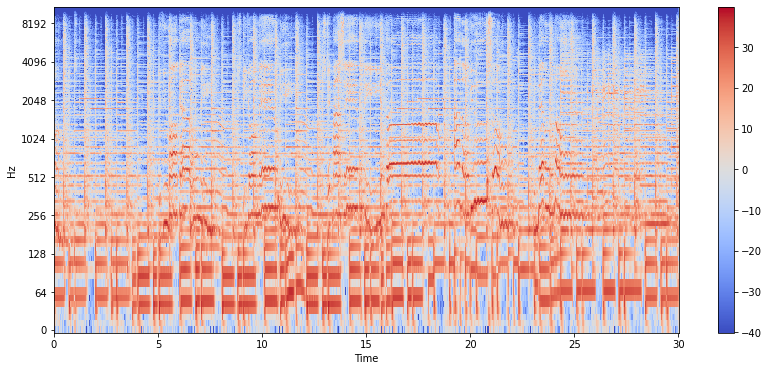

In [13]:
plt.figure(figsize=(14,6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

C:\Users\DVS\AppData\Local\Temp\ipykernel_10708\1391450941.py:2: FutureWarning: Pass y=[ 0.05617309  0.06691528  0.01158691 ... -0.04786133 -0.09861206
 -0.11380982] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]


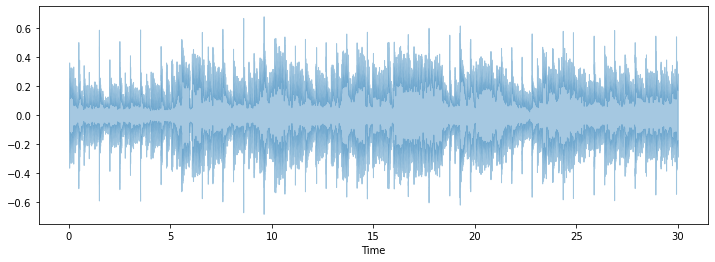

In [14]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sr, alpha=0.4)

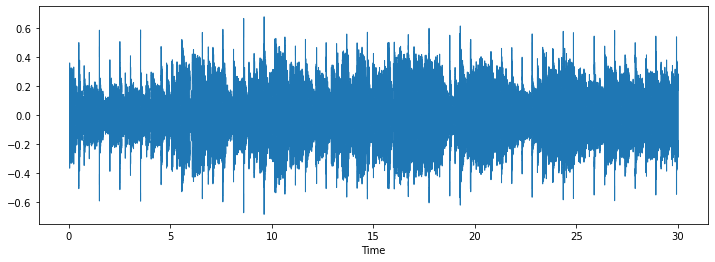

In [15]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sr)
plt.show()

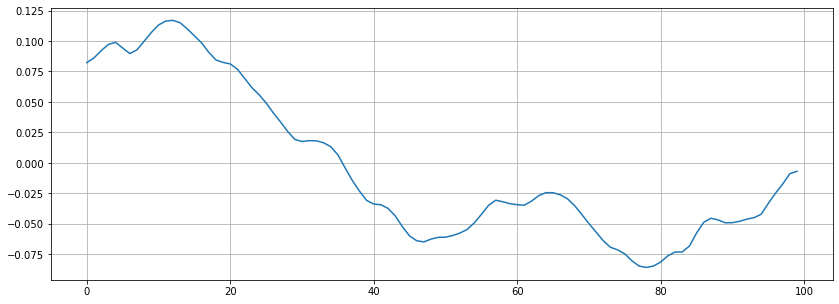

In [16]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14,5))
plt.plot(data[n0:n1])
plt.grid()

In [17]:
zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print("number of zero crossings : ", sum(zero_crossings))

number of zero crossings :  1


C:\Users\DVS\AppData\Local\Temp\ipykernel_10708\2972361736.py:1: FutureWarning: Pass y=[ 0.0461731   0.05691528  0.00158691 ... -0.05786133 -0.10861206
 -0.12380981] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(data, sr=sr)


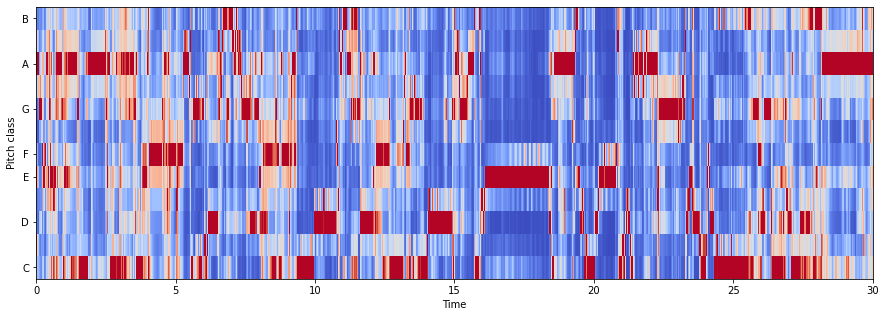

In [18]:
chromagram = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

In [19]:
%matplotlib inline
from keras import layers
import keras

In [20]:
df2.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [21]:
genre_list = df2.iloc[:,-1]
encoder = LabelEncoder()

In [22]:
y = encoder.fit_transform(genre_list)

In [23]:
print(y)

[0 0 0 ... 9 9 9]


In [24]:
print(df2.iloc[:, 1:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df2.iloc[:, 1:-1], dtype = float))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [27]:
from sklearn.svm import SVC

In [28]:
SVM = SVC(kernel='linear', random_state=0)
SVM.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [29]:
Svm_pred = SVM.predict(X_test)

In [30]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
Svm_Acc = round(accuracy_score(Svm_pred,y_test)*100,2)
print("Accuracy of SVM:"+str(Svm_Acc))

Accuracy of SVM:74.67


C:\Users\DVS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


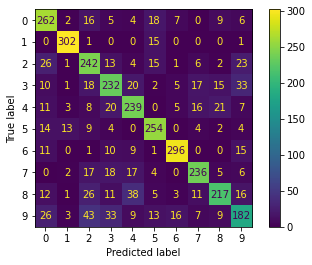

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm =confusion_matrix(y_test,Svm_pred)
plot_confusion_matrix(SVM, X_test, y_test)
plt.show()

In [32]:
from sklearn import svm

In [33]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [34]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [35]:
poly_Acc = round(accuracy_score(poly_pred, y_test)*100,2)
print("The Accuracy of Multi class SVM: "+str(poly_Acc))

The Accuracy of Multi class SVM: 79.83


In [36]:
Rbf_Acc = round(accuracy_score(rbf_pred, y_test)*100,2)
print("The Accuracy of Multi class SVM: "+str(Rbf_Acc))

The Accuracy of Multi class SVM: 9.22


In [37]:
scores = [Svm_Acc, poly_Acc]
algorithms = ["support vector machine", "Multiclass SVM"]
for i in range(len(algorithms)):
    print("The accuracy score "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score support vector machine is: 74.67 %
The accuracy score Multiclass SVM is: 79.83 %


C:\Users\DVS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy Score'>

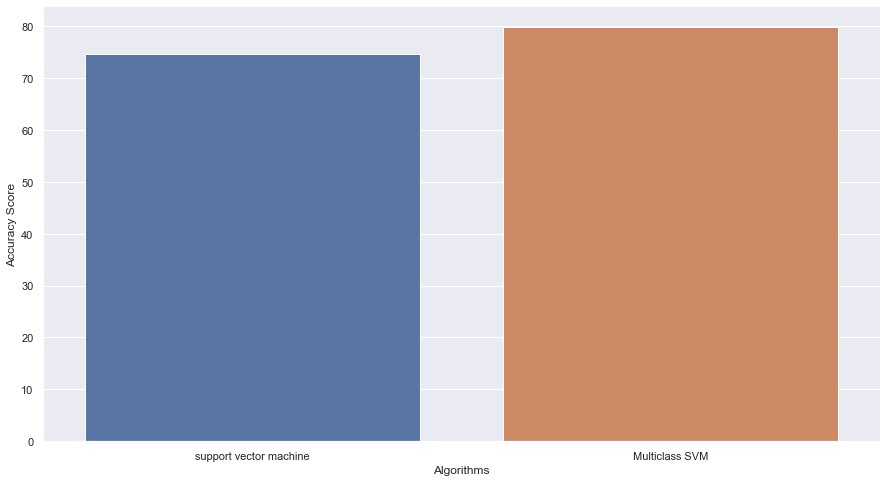

In [38]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
sns.barplot(algorithms, scores)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
Knn_pred = knn.predict(X_test)

In [41]:
Knn_Acc = round(accuracy_score(Knn_pred, y_test)*100,2)
print("The Accuracy of K-Nearest Neighbor: "+str(Knn_Acc))

The Accuracy of K-Nearest Neighbor: 86.53


C:\Users\DVS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


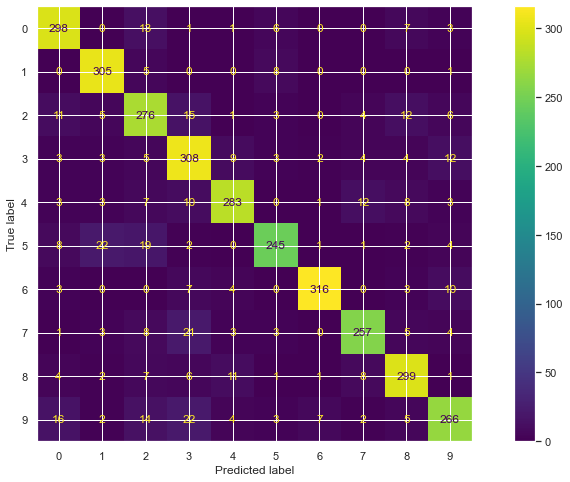

In [42]:
cm = confusion_matrix(y_test, Knn_pred)
plot_confusion_matrix(knn, X_test, y_test)
plt.show()

In [43]:
scores = [Svm_Acc, Knn_Acc]
algorithms = ["support vector machine", "K-Nearest Neighbor"]

for i in range(len(algorithms)):
    print("The accuracy score "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score support vector machine is: 74.67 %
The accuracy score K-Nearest Neighbor is: 86.53 %


C:\Users\DVS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy Score'>

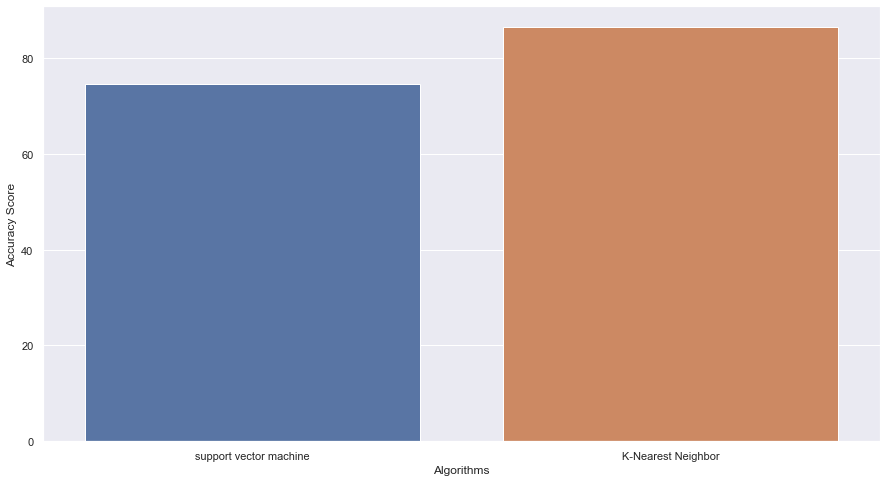

In [44]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
sns.barplot(algorithms, scores)

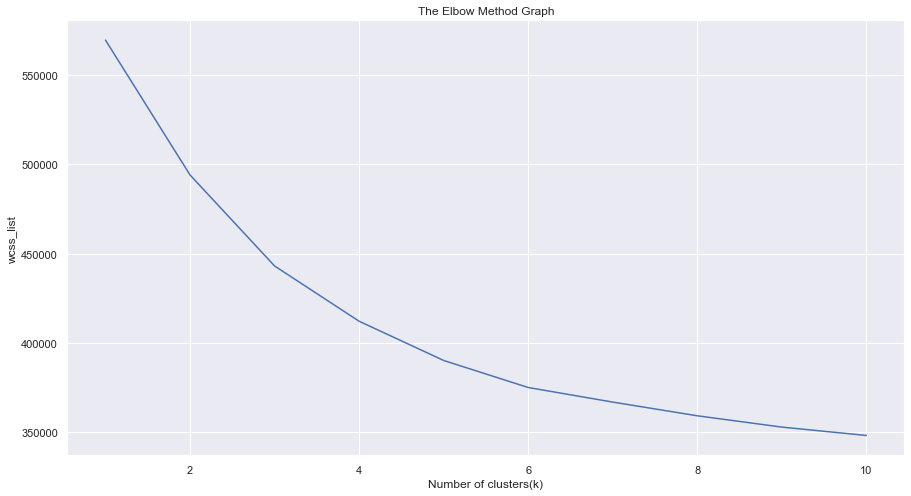

In [45]:
from sklearn.cluster import KMeans
wcss_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel("Number of clusters(k)")
plt.ylabel('wcss_list')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Kmeans_pred = kmeans.fit_predict(X)

In [47]:
Kmeans_pred.shape

(9990,)

In [48]:
y_test.shape

(3297,)

In [49]:
from keras.models import Sequential

In [50]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [51]:
classifier = model.fit(X_train, y_train, epochs=180, batch_size=128)

Epoch 1/180
53/53 [==============================] - 1s 5ms/step - loss: 2.7243 - accuracy: 0.3853
Epoch 2/180
53/53 [==============================] - 0s 4ms/step - loss: 1.6778 - accuracy: 0.5400
Epoch 3/180
53/53 [==============================] - 0s 4ms/step - loss: 1.6906 - accuracy: 0.4520
Epoch 4/180
53/53 [==============================] - 0s 4ms/step - loss: 1.4733 - accuracy: 0.5609
Epoch 5/180
53/53 [==============================] - 0s 4ms/step - loss: 1.9039 - accuracy: 0.3637
Epoch 6/180
53/53 [==============================] - 0s 4ms/step - loss: 1.7024 - accuracy: 0.4028
Epoch 7/180
53/53 [==============================] - 0s 4ms/step - loss: 1.4868 - accuracy: 0.4975
Epoch 8/180
53/53 [==============================] - 0s 5ms/step - loss: 1.5999 - accuracy: 0.3516
Epoch 9/180
53/53 [==============================] - 0s 4ms/step - loss: 1.8300 - accuracy: 0.2600
Epoch 10/180
53/53 [==============================] - 0s 5ms/step - loss: 1.7262 - accuracy: 0.3142
Epoch 11/

53/53 [==============================] - 0s 4ms/step - loss: 2.3819 - accuracy: 0.1624
Epoch 84/180
53/53 [==============================] - 0s 4ms/step - loss: 2.3373 - accuracy: 0.1658
Epoch 85/180
53/53 [==============================] - 0s 4ms/step - loss: 2.2382 - accuracy: 0.1590
Epoch 86/180
53/53 [==============================] - 0s 4ms/step - loss: 2.2855 - accuracy: 0.1481
Epoch 87/180
53/53 [==============================] - 0s 4ms/step - loss: 2.3152 - accuracy: 0.1418
Epoch 88/180
53/53 [==============================] - 0s 4ms/step - loss: 2.3100 - accuracy: 0.1479
Epoch 89/180
53/53 [==============================] - 0s 4ms/step - loss: 2.5915 - accuracy: 0.1458
Epoch 90/180
53/53 [==============================] - 0s 4ms/step - loss: 2.5959 - accuracy: 0.1200
Epoch 91/180
53/53 [==============================] - 0s 5ms/step - loss: 2.7868 - accuracy: 0.1236
Epoch 92/180
53/53 [==============================] - 0s 4ms/step - loss: 3.1909 - accuracy: 0.1388
Epoch 93/180


53/53 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1003
Epoch 165/180
53/53 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1003
Epoch 166/180
53/53 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1003
Epoch 167/180
53/53 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1003
Epoch 168/180
53/53 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1003
Epoch 169/180
53/53 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1003
Epoch 170/180
53/53 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1003
Epoch 171/180
53/53 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1003
Epoch 172/180
53/53 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1003
Epoch 173/180
53/53 [==============================] - 0s 4ms/step - loss: 2.3026 - accuracy: 0.1003
Epoc

In [52]:
CNN_pred = model.predict(X_test)

104/104 [==============================] - 1s 2ms/step


In [53]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)

26/26 [==============================] - 0s 3ms/step - loss: 2.3061 - accuracy: 0.1001


In [54]:
print("The test loss is :", test_loss, "\n The test accuracy is :", test_acc)

The test loss is : 2.306090831756592 
 The test accuracy is : 0.10009099543094635


In [55]:
CNN_Acc = round(test_acc*100,2)
print("The accuracy of Convolutional Neural Network: "+str(CNN_Acc))

The accuracy of Convolutional Neural Network: 10.01


In [56]:
scores = [Svm_Acc, CNN_Acc]
algorithms = ["support vector machine", "CNN"]

for i in range(len(algorithms)):
    print("The accuracy score "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score support vector machine is: 74.67 %
The accuracy score CNN is: 10.01 %


C:\Users\DVS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy Score'>

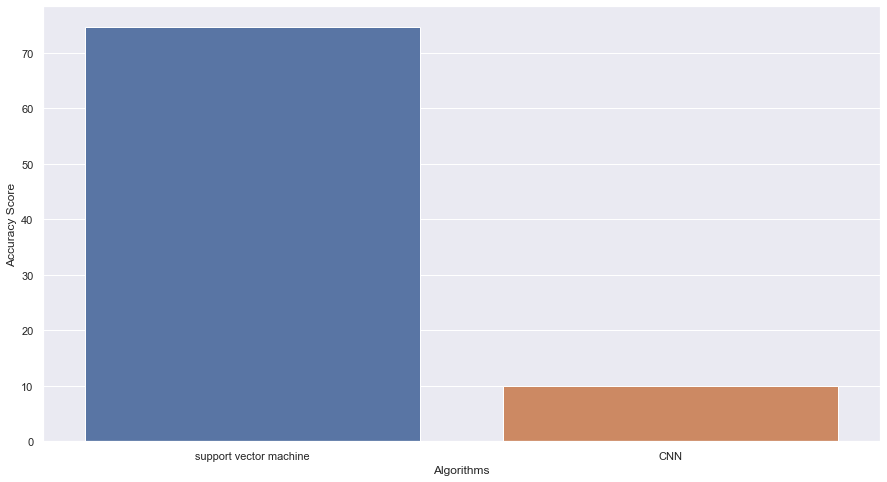

In [57]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
sns.barplot(algorithms, scores)

In [58]:
scores = [Svm_Acc, poly_Acc, CNN_Acc, Knn_Acc]
algorithms = ["support vector machine", "Poly Multiclass SVM", "K-Nearest Neighbor", "CNN"]

for i in range(len(algorithms)):
    print("The accuracy score "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score support vector machine is: 74.67 %
The accuracy score Poly Multiclass SVM is: 79.83 %
The accuracy score K-Nearest Neighbor is: 10.01 %
The accuracy score CNN is: 86.53 %


C:\Users\DVS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy Score'>

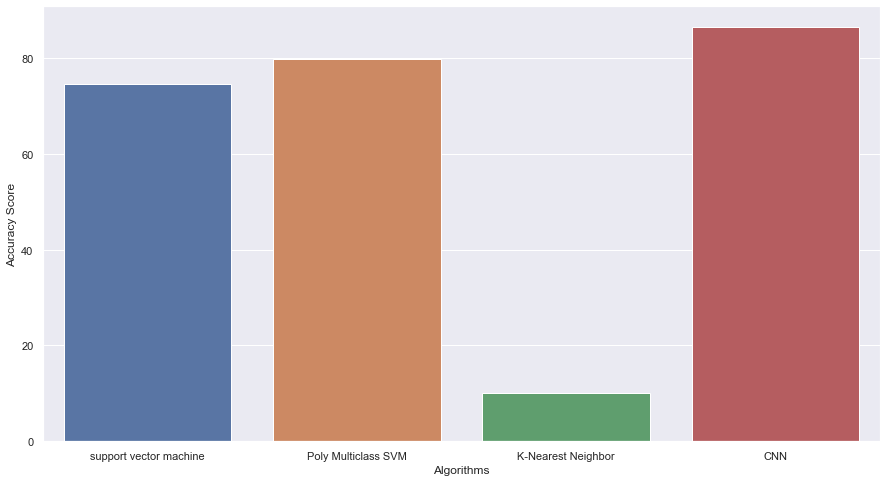

In [59]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
sns.barplot(algorithms, scores)